# **Stage 03 - Supervised Learning**


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# Load Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Pisahkan Categorical & Numerical

cats = []
nums = []

for i in df.columns:
  if df[i].dtype == 'object':
    cats.append(i)
  else:
    nums.append(i)

print('Categorical =', cats)
print('Numerical =', nums)

Categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Numerical = ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


# Pre-Processing


## Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
for i in df.columns:
    percent = round(df[i].isna().sum()*100/len(df[i]),2)
    print(f'''Kolom {i}:''')
    print('Missing values :',df[i].isna().sum(),'dari ',len(df))
    print(f'''Presentase missing value:''',percent, '%')
    print('---'*10)

Kolom CustomerID:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Churn:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Tenure:
Missing values : 264 dari  5630
Presentase missing value: 4.69 %
------------------------------
Kolom PreferredLoginDevice:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom CityTier:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom WarehouseToHome:
Missing values : 251 dari  5630
Presentase missing value: 4.46 %
------------------------------
Kolom PreferredPaymentMode:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom Gender:
Missing values : 0 dari  5630
Presentase missing value: 0.0 %
------------------------------
Kolom HourSpendOnApp:
Missing values : 255 dari  5630
Presentase missing value: 4.53 %
---------

In [ ]:
df2 = df.copy() #Mencopy dataframe

In [ ]:
#Mengganti Phone -> Mobile Phone untuk menghilangkan redundansi data
df2['PreferredLoginDevice'] = df2['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

In [ ]:
# Mengganti CC -> Credit Card & Cash on Delivery -> COD untuk menghilangkan redundansi data
df2['PreferredPaymentMode'] = df2['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'Cash on Delivery' : 'COD'})

### Imputasi data 

In [ ]:
df2['Tenure'].fillna(df2['Tenure'].median(), inplace=True)
df2['WarehouseToHome'].fillna(df2['WarehouseToHome'].median(), inplace=True)
df2['HourSpendOnApp'].fillna(df2['HourSpendOnApp'].median(), inplace=True)
df2['OrderAmountHikeFromlastYear'].fillna(df2['OrderAmountHikeFromlastYear'].median(), inplace=True)
df2['CouponUsed'].fillna(df2['CouponUsed'].median(), inplace=True)
df2['OrderCount'].fillna(df2['OrderCount'].median(), inplace=True)
df2['DaySinceLastOrder'].fillna(df2['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
# Mengecek kembali apakah imputasi data sudah berhasil
df2.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Handling Duplicated Data

In [ ]:
df2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df2.duplicated().sum()

0

tidak ada data duplikasi

## Outlier

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier : {len(df2)}')

filtered_entries = np.array ([True] * len(df2))

for col in ['Tenure', 'WarehouseToHome', 'CouponUsed', 'DaySinceLastOrder', 'CashbackAmount']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df2[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier : {len(df2)}')

Jumlah baris sebelum memfilter outlier : 5630
Jumlah baris setelah memfilter outlier : 5619


## Feature Encoding

In [ ]:
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}
df2['Gender'] = df2['Gender'].map(mapping_gender)

In [ ]:
for cat in ['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']:
  onehots = pd.get_dummies(df2[cat], prefix=cat)
  df2 = df2.join(onehots)

In [ ]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df2 = df2.drop(columns=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']).copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 5629
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5619 non-null   int64  
 1   Churn                                5619 non-null   int64  
 2   Tenure                               5619 non-null   float64
 3   CityTier                             5619 non-null   int64  
 4   WarehouseToHome                      5619 non-null   float64
 5   Gender                               5619 non-null   int64  
 6   HourSpendOnApp                       5619 non-null   float64
 7   NumberOfDeviceRegistered             5619 non-null   int64  
 8   SatisfactionScore                    5619 non-null   int64  
 9   NumberOfAddress                      5619 non-null   int64  
 10  Complain                             5619 non-null   int64  
 11  OrderAmountHikeFromlastYear   

## Feature Transformation

In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:
feature_trans = nums.copy()
del feature_trans[:2]
feature_normal = []
feature_non_normal = []

for i in feature_trans:
  skw = skew(df2[i])
  kts = kurtosis(df2[i])
  if skw < 2 and skw > -2:
    if kts < 2 and kts > -2:
      feature_normal.append(i)
    else:
      feature_non_normal.append(i)
  else:
    feature_non_normal.append(i)

print('Distribusi Normal:', feature_normal)
print('Distribusi Non Normal:', feature_non_normal)

Distribusi Normal: ['Tenure', 'CityTier', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CashbackAmount']
Distribusi Non Normal: ['WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature = df2.columns.tolist()
del feature[:2]
feature

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferredLoginDevice_Computer',
 'PreferredLoginDevice_Mobile Phone',
 'PreferredPaymentMode_COD',
 'PreferredPaymentMode_Credit Card',
 'PreferredPaymentMode_Debit Card',
 'PreferredPaymentMode_E wallet',
 'PreferredPaymentMode_UPI',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']

## Split Data

In [ ]:
# Split Data menjadi Train & Test
transform = feature_normal + feature_non_normal
X = df2[feature]
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for i in transform:
  scaler = StandardScaler().fit(X_train[[i]])
  X_train[i] = scaler.transform(X_train[[i]])
  X_test[i] = scaler.transform(X_test[[i]])

X_train.head()

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3924,1.306801,1.500520,-0.779734,1,0.084913,0.306939,0.668818,1.862855,-0.622729,-1.018592,...,0,0,0,1,0,0,0,0,1,0
2198,-1.209991,-0.701138,-0.191320,1,-1.324215,-0.668175,1.389097,-0.845974,-0.622729,2.584036,...,0,0,0,0,1,0,0,0,0,1
5349,-0.371060,1.500520,-0.779734,1,1.494042,0.306939,-1.492020,-0.458998,-0.622729,-0.187216,...,0,0,0,1,0,0,0,0,1,0
1337,0.228176,1.500520,1.691603,0,-1.324215,0.306939,-1.492020,-1.232950,-0.622729,-1.295717,...,0,0,1,0,0,0,0,0,1,0
1486,0.947259,-0.701138,2.280017,1,-1.324215,-0.668175,-1.492020,0.701928,-0.622729,-0.741467,...,0,0,0,0,1,0,0,0,0,1


## Class Imbalance

Karena target klasifikasi pada pemodelan yang akan dilakukan menggunakan kolom churn, maka perlu dicek dahulu apakah kolom churn memiliki data yang imbalanced atau balanced.

In [ ]:
df2['Churn_Class'] = df2['Churn']>0.9
print(df2['Churn_Class'].value_counts())
#Menampilkan jumlah pelanggan churn dan tidak, membuat target bertipe categorical

False    4671
True      948
Name: Churn_Class, dtype: int64


In [ ]:
x = df2[[col for col in df2.columns if col not in ['Churn_Class','Churn']]].values
y = df2['Churn_Class'].values
print(x.shape)
print(y.shape)
#Pemisahan feature dan target

(5619, 31)
(5619,)


In [ ]:
y.shape

(5619,)

In [ ]:
y_train.shape

(3933,)

In [ ]:
print(pd.Series(y_train).value_counts())

0    3255
1     678
Name: Churn, dtype: int64


In [ ]:
X_train.shape

(3933, 30)

In [ ]:
#Over Sampling menggunakan SMOTE
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(X_train, y_train)


In [ ]:
# Sebelum Oversampling
print('Target sebelum oversampling:')
print(pd.Series(y_train).value_counts())

Target sebelum oversampling:
0    3255
1     678
Name: Churn, dtype: int64


In [ ]:
# Setelah Oversampling
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
0    3255
1    3255
Name: Churn, dtype: int64


In [ ]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
6505    1
6506    1
6507    1
6508    1
6509    1
Name: Churn, Length: 6510, dtype: int64

In [ ]:
X_train_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               6510 non-null   float64
 1   CityTier                             6510 non-null   float64
 2   WarehouseToHome                      6510 non-null   float64
 3   Gender                               6510 non-null   int64  
 4   HourSpendOnApp                       6510 non-null   float64
 5   NumberOfDeviceRegistered             6510 non-null   float64
 6   SatisfactionScore                    6510 non-null   float64
 7   NumberOfAddress                      6510 non-null   float64
 8   Complain                             6510 non-null   float64
 9   OrderAmountHikeFromlastYear          6510 non-null   float64
 10  CouponUsed                           6510 non-null   float64
 11  OrderCount                    

# Modeling The Data

## Model Evaluasi (default)





In [ ]:
# Model Evaluation Classification test

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.80
Recall (Test Set): 0.87
F1-Score (Test Set): 0.83
roc_auc (test-proba): 0.91
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9705914504568053


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.69
Recall (Test Set): 0.54
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8863142140973974
roc_auc (crossval test): 0.8847624377046086


## ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train, y_train)
eval_classification(ada)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.58
F1-Score (Test Set): 0.62
roc_auc (test-proba): 0.91
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.9296688107323204
roc_auc (crossval test): 0.9187608592018532


## XGBoost

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier(random_state=3)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.76
Recall (Test Set): 0.63
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.9596599134998665
roc_auc (crossval test): 0.9480078097263744


## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.78
F1-Score (Test Set): 0.85
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


Untuk menghindari nilai false positive churn, Kami memutuskan untuk memilih model dengan nilai gap roc-auc paling kecil dan memiliki nilai precision yang besar. Dari beberapa hasil uji model, **Random Forest** menjadi model algoritma yang paling cocok.

In [ ]:
# Random Forest Modeling setelah Oversampling
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_smote, y_train_smote)

y_pred_over = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.52
Recall (Test Set): 0.09
F1-Score (Test Set): 0.16
roc_auc (test-proba): 0.80
roc_auc (train-proba): 0.80
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9991317190198131


## K-Fold Cross Validation

### Check Train & Validation pada masing-masing iterasi

In [ ]:
from sklearn.model_selection import KFold

import pandas as pd

dataset = df2
X = df2[feature]
y = df2['Churn']
kf = KFold(n_splits=5, random_state=3, shuffle=True)
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validatorprint(kf)

5

In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [   1    2    3 ... 5616 5617 5618] TEST: [   0    6    9 ... 5609 5611 5613]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   4    8   19 ... 5600 5607 5614]
TRAIN: [   0    1    2 ... 5614 5616 5618] TEST: [   3    5   16 ... 5612 5615 5617]
TRAIN: [   0    3    4 ... 5614 5615 5617] TEST: [   1    2   10 ... 5608 5616 5618]
TRAIN: [   0    1    2 ... 5616 5617 5618] TEST: [   7   13   14 ... 5604 5605 5606]


### Cross Validation in Validation Set Only

In [ ]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
result = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
result.mean()

0.9903829922943208

### Cross Validation in Train Set & Validation Set

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
model = RandomForestClassifier()
score = cross_validate(model, X, y, cv=kf, scoring='roc_auc', return_train_score=True)
print('roc_auc (train): '+ str(score['train_score'].mean()))
print('roc_auc (test): '+ str(score['test_score'].mean()))

roc_auc (train): 1.0
roc_auc (test): 0.9903165931777929


Setelah dilakukan k-fold cross validation, model sudah best-fit terlihat dari score train dan score test yang memiliki selisih sangat kecil.

## Hyperparameter Tuning



In [ ]:
# Hyperparameter Tuning RandomForest
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(700, 800, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=3)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=3, cv=5)
rs.fit(X_train_smote, y_train_smote)
eval_classification(rs)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.67
Recall (Test Set): 0.30
F1-Score (Test Set): 0.42
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.83
roc_auc (crossval train): 0.9974605168250431
roc_auc (crossval test): 0.9857799176417457


### Learning Curve

param value: 10; train: 0.9955316764236044; test: 0.7942661211317927
param value: 10; train: 0.9953403602162336; test: 0.7983720394168157
param value: 11; train: 0.9945822685647273; test: 0.8164957067942143
param value: 11; train: 0.9947609373267171; test: 0.776021437215467
param value: 12; train: 0.9937172399310052; test: 0.778793292226128
param value: 13; train: 0.992667596348286; test: 0.7907825736183944
param value: 13; train: 0.993432011722483; test: 0.7694058664207919
param value: 14; train: 0.9923777433276467; test: 0.7974989915288423
param value: 14; train: 0.9922857190049101; test: 0.7851380164813001
param value: 15; train: 0.9914037012654524; test: 0.7830605658963867
param value: 16; train: 0.9909602856057442; test: 0.7955079813288768
param value: 16; train: 0.9907606636133468; test: 0.7763614360629287
param value: 17; train: 0.9897890755330923; test: 0.7684118019938916
param value: 17; train: 0.9897790708374921; test: 0.7997896617299604
param value: 18; train: 0.988776996750

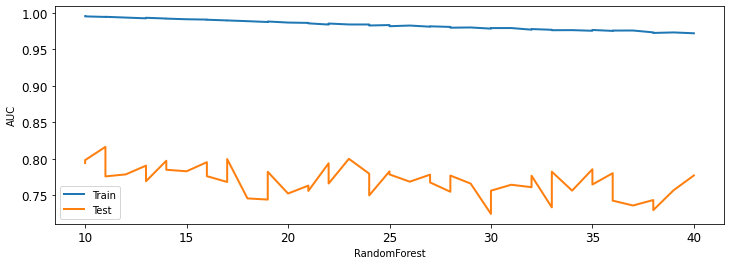

In [ ]:
# param_values = [int(x) for x in np.linspace(700, 800, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(750, 800, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(10, 40, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for i in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=i)
    model.fit(X_train_smote, y_train_smote)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train_smote)
    train_auc = roc_auc_score(y_train_smote, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.ylabel('AUC')
plt.xlabel('RandomForest')
plt.legend()
plt.show()

## Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       938
           1       0.95      0.78      0.85       185

    accuracy                           0.96      1123
   macro avg       0.95      0.88      0.91      1123
weighted avg       0.96      0.96      0.95      1123



# Feature Importance

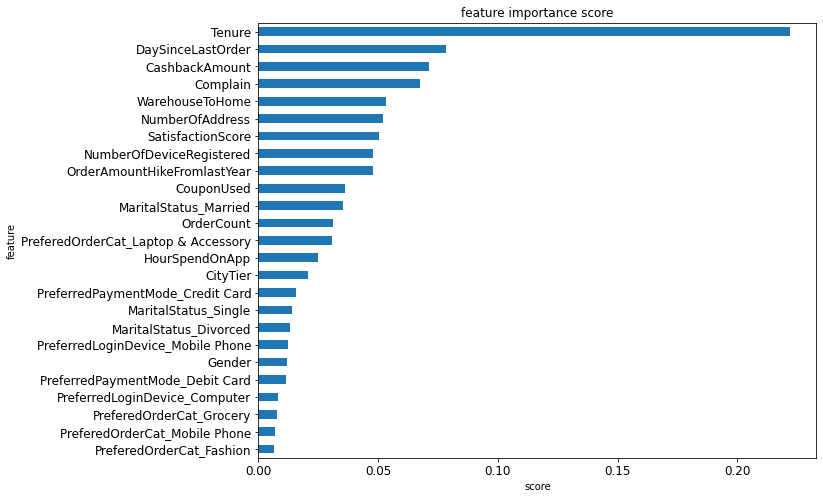

In [116]:
show_feature_importance(rf)

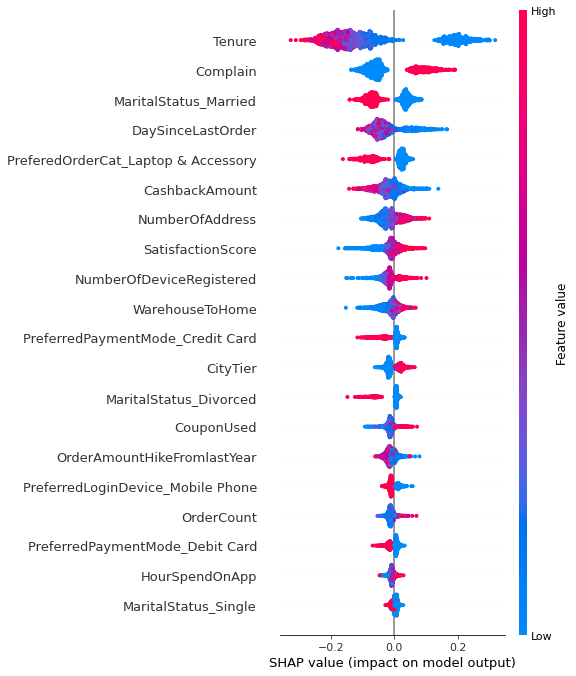

In [117]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)